# Benford's Law

* Various data and plots to explore Benford's Law

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns; sns.set()
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')


In [213]:
benfords = [np.log10(1 + 1/d) for d in range(1,10)]
uniform_first = [1/9 for d in range(1,10)]
digs = np.arange(1,10) 

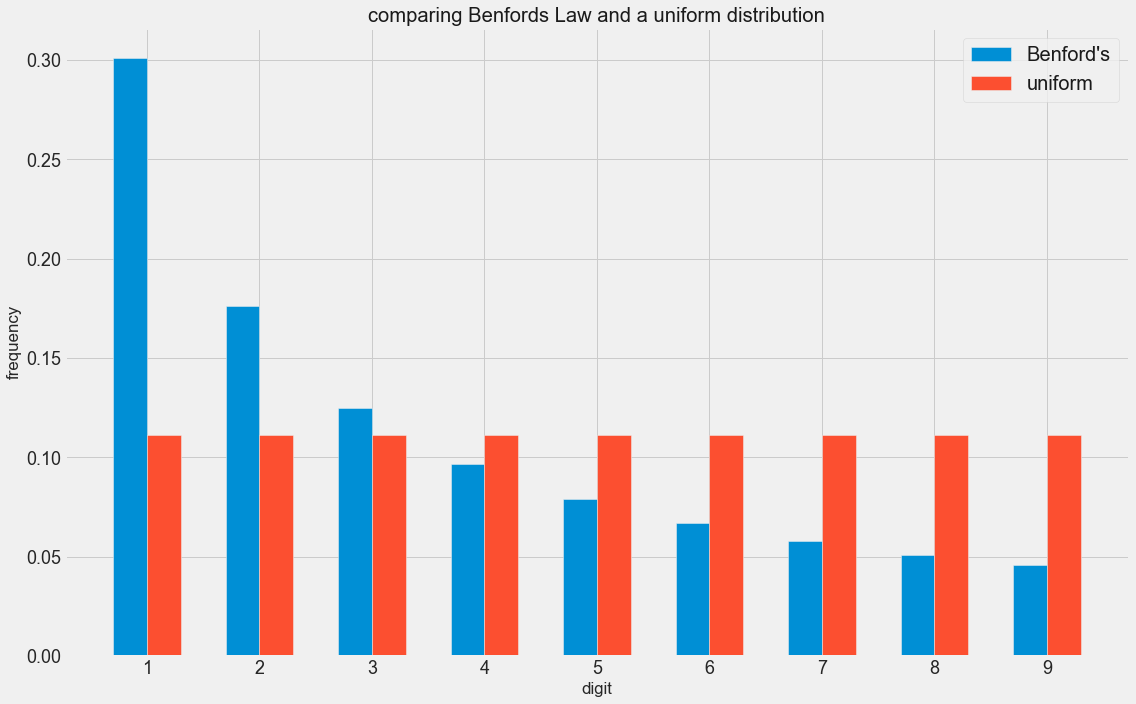

In [214]:
# comparing Benford with Uniform distribution
width = 0.3       
plt.bar(digs, benfords, width, label='Benford\'s')
plt.bar(digs + width, uniform_first, width,
    label='uniform')
plt.title('comparing Benfords Law and a uniform distribution')

plt.xticks(digs + width / 2, ind)
plt.ylabel('frequency')
plt.xlabel('digit')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.savefig('benford_vs_uniform.png',dpi=200)
plt.show()

# US City Populations

In [215]:
city_df = pd.read_excel('Census_Town&CityPopulations.xlsx')

# eliminate towns of less than 100
city_df = city_df[city_df['7_2009'] > 100]

# get first digit
city_df['first_digit'] = city_df['7_2009'].apply(lambda x: str(x)[0]).astype(int)
city_df['first_digit'].value_counts()

1    5654
2    3452
3    2266
4    1747
5    1434
6    1218
7    1016
8     858
9     748
Name: first_digit, dtype: int64

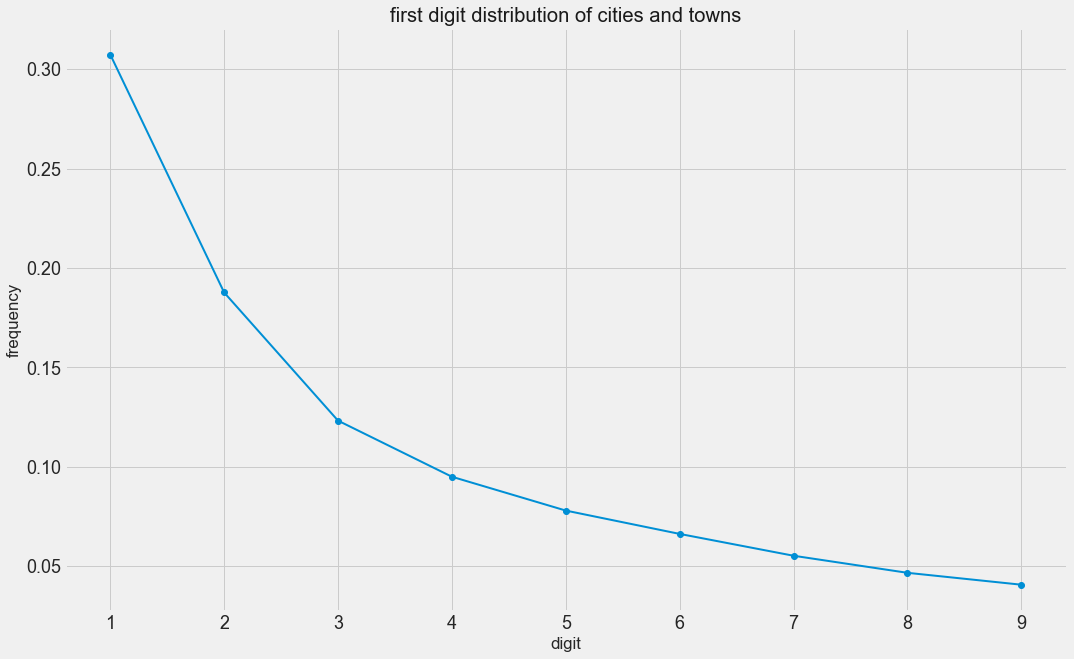

In [216]:
first_digits = city_df['first_digit'].value_counts().values

# as a percent
first_digits = [i/sum(first_digits) for i in first_digits]

plt.plot(digs, first_digits, 'o-',linewidth=2)
plt.title('first digit distribution of cities and towns')
plt.xlabel('digit')
plt.ylabel('frequency')
plt.savefig('first_digit_distribution_city_towns.png')

In [217]:
city_df['second_digit'] = city_df['7_2009'].apply(lambda x: str(x)[1]).astype(int)
second_digits = list(city_df['second_digit'].value_counts().sort_index())
second_digits = [i/sum(second_digits) for i in second_digits]
zero_digs = np.arange(10)
city_df['second_digit'].value_counts()

0    2170
1    2124
2    2091
3    1949
4    1864
6    1762
5    1728
8    1619
7    1596
9    1490
Name: second_digit, dtype: int64

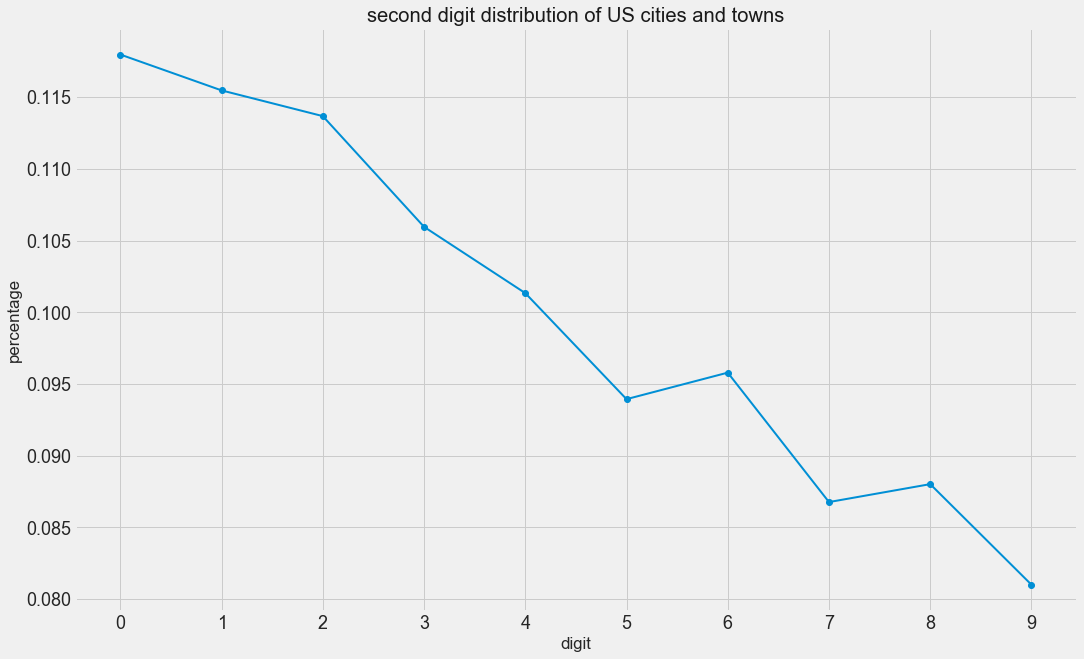

In [218]:
plt.plot(zero_digs, second_digits, 'o-',linewidth=2)
plt.title('second digit distribution of US cities and towns')
plt.xlabel('digit')
plt.ylabel('percentage')
plt.xticks(zero_digs)
plt.savefig('second_digit_distribution_city_towns.png')

In [179]:
city_df['last_digit'] = city_df['7_2009'].apply(lambda x: str(x)[-1])

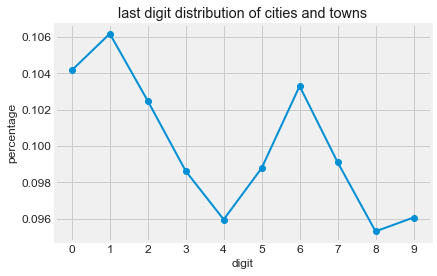

In [180]:
last_digits = list(city_df['last_digit'].value_counts().sort_index())
last_digits = [i/sum(last_digits) for i in last_digits]

plt.plot(zero_digs, last_digits, 'o-',linewidth=2)
plt.title('last digit distribution of cities and towns')
plt.xlabel('digit')
plt.ylabel('percentage')
plt.xticks(zero_digs)
plt.savefig('last_digit_distribution_city_towns.png')

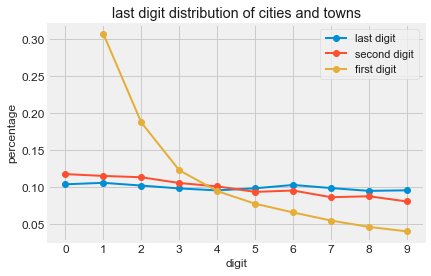

In [181]:
last_digits = list(city_df['last_digit'].value_counts().sort_index())
last_digits = [i/sum(last_digits) for i in last_digits]

plt.plot(zero_digs, last_digits, 'o-',linewidth=2,label = 'last digit')
plt.plot(zero_digs, second_digits, 'o-',linewidth=2,label='second digit')
plt.plot(zero_digs[1:], first_digits, 'o-',linewidth=2,label='first digit')
plt.title('last digit distribution of cities and towns')
plt.xlabel('digit')
plt.ylabel('percentage')
plt.xticks(zero_digs)
plt.legend()
plt.savefig('digits_compare_distribution_city_towns.png')

# Iranian Election Data

In [182]:
iran_df = pd.read_csv('election-iran-2009.csv')
def convert_str_float(pdSeries):
    return pdSeries.apply(lambda x:x.replace(',','')).astype(int)
vars_to_convert = ['Ahmadinejad','Rezai','Karrubi','Mousavi','Total votes','Valid votes']    
for col in vars_to_convert:
    iran_df[col] = convert_str_float(iran_df[col])


In [183]:
iran_df.sum()

Region           East AzerbaijanWest AzerbaijanArdabilIsfahanIl...
Ahmadinejad                                               24515209
%                                                          1969.86
Rezai                                                       659281
%                                                            47.45
Karrubi                                                     328979
%.1                                                          28.13
Mousavi                                                   13225330
%.2                                                         954.51
Total votes                                               39145990
Invalid votes    17,20520,0944,37225,1633,4956,193115,7012,9531...
Valid votes                                               38728799
Turnout, %                                                 2276.87
dtype: object

In [184]:
# top two vote getters are Ahmadinejad and Mousavi
iran_df['A_first'] = iran_df['Ahmadinejad'].apply(lambda x: str(x)[0]).astype(int)
iran_df['M_first'] = iran_df['Mousavi'].apply(lambda x: str(x)[0]).astype(int)
iran_df['T_V_first'] = iran_df['Total votes'].apply(lambda x: str(x)[0]).astype(int)

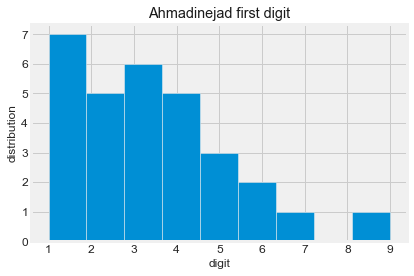

In [185]:
A_first = [i/30 for i in list(iran_df['A_first'].value_counts().sort_index())]
iran_df['A_first'].hist(bins=9)
plt.title('Ahmadinejad first digit')
plt.xlabel('digit')
plt.ylabel('distribution')
plt.savefig('Ahmadinejad_first_digit.png')

In [186]:
four_men = ['Ahmadinejad','Rezai','Karrubi','Mousavi']
digit_dict = dict(zip([i for i in range(0,10)], [0]*len([i for i in range(0,10)])))
for col in four_men:
    for arr in iran_df[col].apply(lambda x: [int(i) for i in str(x)[-2:]]):
        digit_dict[arr[0]] += 1
        digit_dict[arr[1]] += 1
    

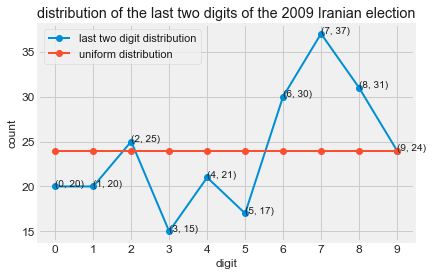

In [187]:
lists = sorted(digit_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, 'o-',linewidth = 2, label ='last two digit distribution')
plt.plot(x,[24]*len(x), 'o-',linewidth = 2, label ='uniform distribution')

for xy in zip(x, y):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.xticks(zero_digs)
plt.xlabel('digit')
plt.ylabel('count')
plt.title('distribution of the last two digits of the 2009 Iranian election')
plt.legend(loc='upper left')
plt.savefig('2009_iranian_election_last_two.png',dpi=200)
plt.show()

# USA Election Results

In [188]:
usa_df = pd.read_csv('election-us-2008.csv', encoding = "ISO-8859-1")
def convert_str_float(pdSeries):
    return pdSeries.apply(lambda x:x.replace(',','')).astype(int)
vars_to_convert = ['Obama','McCain']    
for col in vars_to_convert:
    usa_df[col] = convert_str_float(usa_df[col])

In [189]:
digit_dict_usa = dict(zip([i for i in range(0,10)], [0]*len([i for i in range(0,10)])))
for col in vars_to_convert:
    for arr in usa_df[col].apply(lambda x: [int(i) for i in str(x)[-2:]]):
        digit_dict_usa[arr[0]] += 1
        digit_dict_usa[arr[1]] += 1

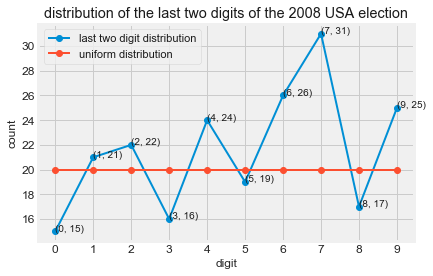

In [190]:
lists = sorted(digit_dict_usa.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, 'o-',linewidth = 2, label ='last two digit distribution')
plt.plot(x,[20]*len(x), 'o-',linewidth = 2, label ='uniform distribution')

for xy in zip(x, y):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.xticks(zero_digs)
plt.xlabel('digit')
plt.ylabel('count')
plt.title('distribution of the last two digits of the 2008 USA election')
plt.legend(loc='upper left')
plt.savefig('2008_USA_election_last_two.png',dpi=200)
plt.show()

In [191]:
wi_voter_data = pd.read_csv('WI_2016_voting_results.csv',header=1)
wi_voter_data = wi_voter_data[wi_voter_data['Total Votes'] > 100]

# Trump first digit
wi_voter_data['T_first_digit'] = wi_voter_data['Donald J. Trump / Michael R. Pence'].apply(lambda x: str(x)[0])

# Clinton first digit
wi_voter_data['H_first_digit'] = wi_voter_data['Hillary Clinton / Tim Kaine'].apply(lambda x: str(x)[0])

# Total Votes
wi_voter_data['T_V_first_digit'] = wi_voter_data['Total Votes'].apply(lambda x: str(x)[0])

In [192]:
# sort and normalize
T_first = list(wi_voter_data['T_first_digit'].value_counts().sort_index())
T_first = [i/sum(T_first) for i in T_first]

H_first = list(wi_voter_data['H_first_digit'].value_counts().sort_index())
H_first = [i/sum(H_first) for i in H_first]

T_V_first = list(wi_voter_data['T_V_first_digit'].value_counts().sort_index())
T_V_first = [i/sum(T_V_first) for i in T_V_first]

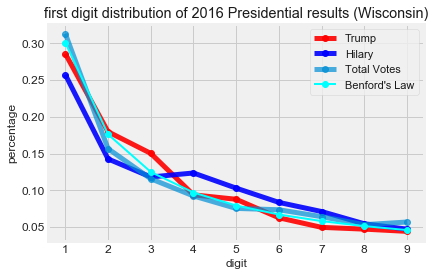

In [193]:

plt.plot(digs, T_first, 'o-',linewidth=5,c='red',label = 'Trump',alpha=0.9)
plt.plot(digs, H_first, 'o-',linewidth=5,c='blue',label='Hilary',alpha=0.9)
plt.plot(digs, T_V_first, 'o-',linewidth=5,label='Total Votes',alpha=0.7)
plt.plot(digs, benfords, 'o-',
         linewidth=2,label='Benford\'s Law',c='cyan',alpha=1.0)
plt.title('first digit distribution of 2016 Presidential results (Wisconsin)')
plt.xlabel('digit')
plt.ylabel('percentage')
plt.xticks(digs)
plt.legend()
plt.savefig('wisconsin_first_digit_distribution.png', dpi=200)

In [194]:
four_men = ['Donald J. Trump / Michael R. Pence','Hillary Clinton / Tim Kaine']
digit_dict_wi = dict(zip([i for i in range(0,10)], [0]*len([i for i in range(0,10)])))
for col in four_men:
    for arr in wi_voter_data[col].apply(lambda x: [int(i) for i in str(x)[-2:]]):
        try:
            digit_dict_wi[arr[0]] += 1
            digit_dict_wi[arr[1]] += 1
        except:
            continue

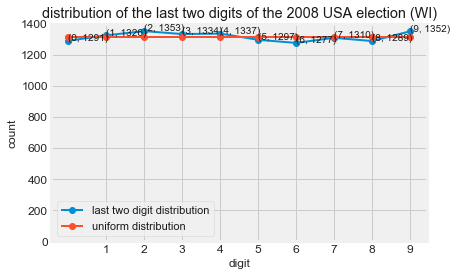

In [195]:
lists = sorted(digit_dict_wi.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, 'o-',linewidth = 2, label ='last two digit distribution')
plt.plot(x,[1318]*len(x), 'o-',linewidth = 2, label ='uniform distribution')

for xy in zip(x, y):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.xticks(digs)
plt.xlabel('digit')
plt.ylabel('count')
plt.ylim([0,1400])
plt.title('distribution of the last two digits of the 2008 USA election (WI)')
plt.legend(loc='lower left')
plt.savefig('2008_USA_election_last_two_WI.png',dpi=200)
plt.show()

In [196]:
print(len(wi_voter_data)*2*2/10)

1318.4


# Fraudulent checks example

In [197]:
Q4 = [155,76,57,51,36,27,30,27,25]
Q4 = [i/sum(Q4) for i in Q4]

Q1 = [146, 78, 67,52,40,60,28,25,26]
Q1 = [i/sum(Q1) for i in Q1]

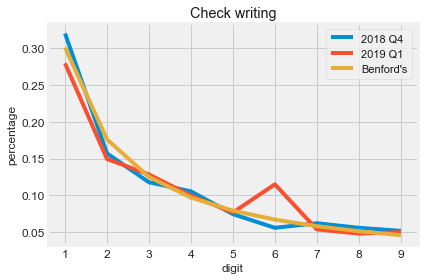

In [199]:
plt.plot(digs,Q4,label='2018 Q4')
plt.plot(digs,Q1, label='2019 Q1')
plt.plot(digs,benfords, label = 'Benford\'s')
plt.legend(loc='best')
plt.title('Check writing')
plt.xlabel('digit')
plt.ylabel('percentage')
plt.tight_layout()
plt.savefig('check_writing.png', dpi=200)

In [200]:
def fib(n):
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        lst = fib(n-1)
        lst.append(lst[-1] + lst[-2])
        return lst       
    
def get_first_digits_fib(N):
    vals = [int(str(i)[0]) for i in fib(N)[1:]]
    vals = [vals.count(x)/len(vals) for x in set(vals)]
    
    return vals

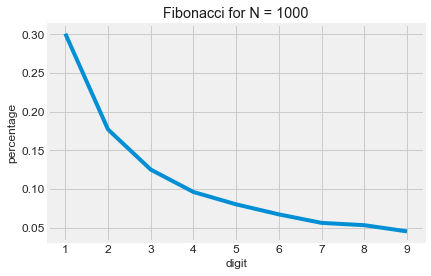

In [201]:
N = 1000
#plt.ylim([0,0.4])
plt.plot(digs,get_first_digits_fib(N))
plt.xlabel('digit')
plt.ylabel('percentage')
plt.title(f'Fibonacci for N = {N}')
plt.xticks(digs);
#plt.legend();

In [138]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

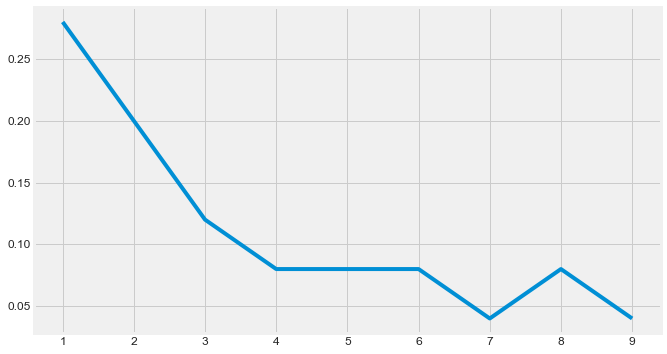

In [164]:
fig = plt.figure(figsize=(10,6))
plt.ylim([0,0.4])
plt.xlabel('Year',fontsize=20)
plt.ylabel('frequency',fontsize=20)
plt.title('Fibonacci Distribution',fontsize=20)

def animate(i):
    fig.clear()
    data = get_first_digits_fib(25 + i*4) #select data range
    plt.plot(digs,data)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=300, repeat=True)

ani.save('Fib_Benford.mp4', writer=writer)